<a href="https://colab.research.google.com/github/Subhraj07/Machine_Learning_Models/blob/master/MLpractice/CEREBRINOCS/classification_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Article [https://colab.research.google.com/drive/1JW2I6cU_ypfRXfIfqMPQwMEA6LzGav-Y#forceEdit=true&offline=true&sandboxMode=true&scrollTo=1XwFNO4re_Fz]
# datasets [https://github.com/suraj-deshmukh/BBC-Dataset-News-Classification]
# https://raw.githubusercontent.com/suraj-deshmukh/BBC-Dataset-News-Classification/master/dataset/dataset.csv
# https://raw.githubusercontent.com/Subhraj07/Machine_Learning_Models/master/MLpractice/CEREBRINOCS/datasets/news_article.csv

In [0]:
# Generate Raw data
import os
import pandas as pd
from sklearn.model_selection import train_test_split

data_folder = "data/bbc-fulltext/bbc/"
folders = ["business","entertainment","politics","sport","tech"]

os.chdir(data_folder)

x = []
y = []
z = []

for i in folders:
    files = os.listdir(i)
    for text_file in files:
        file_path = i + "/" +text_file
        print("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
        data = ' '.join(data)
        x.append(data)
        y.append(i)
        z.append(text_file)
        
data = {'news': x, 'type': y, 'filename':z}       
df = pd.DataFrame(data)
print('writing csv flie ...')
df.to_csv("C:/Users/212747507/Desktop/jupyter_notebooks/news_article.csv", index=False)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Subhraj07/Machine_Learning_Models/master/MLpractice/CEREBRINOCS/datasets/news_article.csv", encoding='cp1252')

In [0]:
new = df["news"].str.split("\n", n = 1, expand = True)
df["title"] = new[0]
df["content"] = new[1]
df.drop(["news"], axis=1, inplace=True)
df.rename(columns={'type': 'category'}, inplace=True)
df['content'].replace(r'\n',' ', regex=True, inplace=True) 

In [0]:
df['category_id'] = df['category'].factorize()[0]
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [38]:
df.sample(5, random_state=0)

,category,filename,title,content,category_id
384,business,385.txt,Tate & Lyle boss bags top award,Tate & Lyle's chief executive has been name...,0
1983,tech,160.txt,Halo 2 sells five million copies,Microsoft is celebrating bumper sales of it...,4
985,politics,090.txt,MSPs hear renewed climate warning,Climate change could be completely out of c...,2
1386,sport,074.txt,Pavey focuses on indoor success,Jo Pavey will miss January's View From Grea...,3
1294,politics,399.txt,Tories reject rethink on axed MP,Sacked MP Howard Flight's local Conservativ...,2


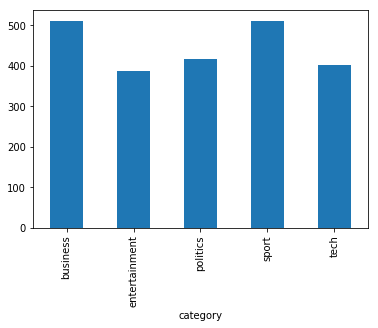

In [39]:
df.groupby('category').filename.count().plot.bar(ylim=0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

* sublinear_df is set to True to use a logarithmic form for frequency, to give diminishing returns as the frequency of a word increases

* min_df is the minimum numbers of documents a word must be present in to be kept, and we are setting it to 5. This is to avoid rare words, which drastically increase the size of our features and might cause overfitting

* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1. This is helpful for visualizing these vectors, and can also improve (or deteriorate) the performance of some models.

* encoding is set to latin-1 which is used by our input text.
* 
ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams, or in other terms: we want to consider single words ("prices", "player") and pairs of words ("stock prices", "football player").

* Finally, stop_words is set to "english" to remove all common pronouns ("a", "the", ...) and further reduce the number of noisy features.

In [46]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.content).toarray()
labels = df.category_id
features.shape

(2225, 14268)

In [0]:
from sklearn.feature_selection import chi2
import numpy as np

In [57]:
N = 3
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . shares
  . Most correlated bigrams:
       . analysts said
       . stock market
       . economic growth
# 'entertainment':
  . Most correlated unigrams:
       . awards
       . actor
       . film
  . Most correlated bigrams:
       . film festival
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . coach
       . match
       . cup
  . Most correlated bigrams:
       . grand slam
       . australian open
       . champions league
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone


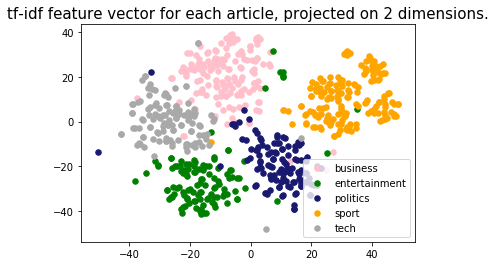

In [63]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [64]:
df[df.title.str.contains('Arsenal')]

,category,filename,title,content,category_id
270,business,271.txt,Arsenal 'may seek full share listing',Arsenal vice-chairman David Dein has said t...,0
1469,sport,157.txt,Wenger dejected as Arsenal slump,Arsenal manager Arsene Wenger claimed their...,3
1475,sport,163.txt,Arsenal through on penalties,Arsenal win 4-2 on penalties The Spanish...,3
1523,sport,211.txt,Edu blasts Arsenal,Arsenal's Brazilian midfielder Edu has hit ...,3
1558,sport,246.txt,Chelsea hold Arsenal,A gripping game between Arsenal and Chelsea...,3
1580,sport,268.txt,Campbell rescues Arsenal,Sol Campbell proved to be an unlikely match...,3
1592,sport,280.txt,Mourinho takes swipe at Arsenal,Chelsea boss Jose Mourinho has attempted to...,3


**Model training and evaluation**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [88]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.776786
1,RandomForestClassifier,1,0.804494
2,RandomForestClassifier,2,0.765766
3,RandomForestClassifier,3,0.837838
4,RandomForestClassifier,4,0.873874
5,MultinomialNB,0,0.955357
6,MultinomialNB,1,0.957303
7,MultinomialNB,2,0.941441
8,MultinomialNB,3,0.977477
9,MultinomialNB,4,0.977477


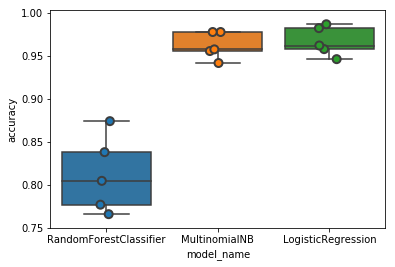

In [68]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [69]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.966760
MultinomialNB             0.961811
RandomForestClassifier    0.811752
Name: accuracy, dtype: float64

**Model interpretation**

In [70]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted')

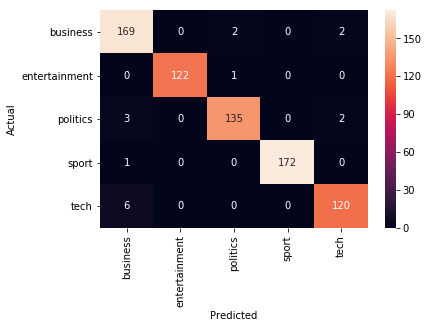

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [72]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
      print('')

'politics' predicted as 'business' : 3 examples.


,title,content
933,Borders rail link campaign rally,Campaigners are to stage a rally calling fo...
971,Report attacks defence spending,The Ministry of Defence has been criticised...
979,Job cuts 'false economy' - TUC,"Plans to shed 71,000 civil service jobs wil..."



'tech' predicted as 'business' : 6 examples.


,title,content
1955,US duo in first spam conviction,A brother and sister in the US have been co...
2065,PC ownership to 'double by 2010',The number of personal computers worldwide ...
1942,Argonaut founder rebuilds empire,"Jez San, the man behind the Argonaut games ..."
1999,US duo in first spam conviction,A brother and sister in the US have been co...
2213,Anti-spam laws bite spammer hard,The net's self-declared spam king is seekin...
1937,Games maker fights for survival,One of Britain's largest independent game m...



'business' predicted as 'politics' : 2 examples.


,title,content
132,Salary scandal in Cameroon,Cameroon says widespread corruption in its ...
486,World leaders gather to face uncertainty,"More than 2,000 business and political lead..."



'business' predicted as 'tech' : 2 examples.


,title,content
446,News Corp eyes video games market,"News Corp, the media company controlled by ..."
204,Orange colour clash set for court,A row over the colour orange could hit the ...



'politics' predicted as 'tech' : 2 examples.


,title,content
1205,MPs issued with Blackberry threat,MPs will be thrown out of the Commons if th...
1018,MPs issued with Blackberry threat,MPs will be thrown out of the Commons if th...


In [73]:
model.fit(features, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
from sklearn.feature_selection import chi2

N = 5
for category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . company
       . shares
       . bank
       . market
       . firm
  . Top bigrams:
       . chief executive
       . stock market
       . analysts said
       . economic growth
       . oil prices
# 'entertainment':
  . Top unigrams:
       . film
       . music
       . singer
       . band
       . star
  . Top bigrams:
       . box office
       . los angeles
       . new york
       . film festival
       . ticket sales
# 'politics':
  . Top unigrams:
       . labour
       . party
       . mr
       . government
       . election
  . Top bigrams:
       . mr blair
       . tony blair
       . prime minister
       . general election
       . mr brown
# 'sport':
  . Top unigrams:
       . match
       . club
       . cup
       . win
       . game
  . Top bigrams:
       . year old
       . australian open
       . champions league
       . world number
       . bbc sport
# 'tech':
  . Top unigrams:
       . computer
       . users
      

In [76]:
df[df.content.str.lower().str.contains('news website')].category.value_counts()

tech             69
politics          8
entertainment     7
business          1
Name: category, dtype: int64

In [77]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]

text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'business'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'



In [0]:
def test_article(texts):
  text_features = tfidf.transform(texts)
  predictions = model.predict(text_features)
  for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

In [87]:
test_article(["Asus 6z (ZenFone 6) launch today: Expected pricing, specifications, live stream"])

"Asus 6z (ZenFone 6) launch today: Expected pricing, specifications, live stream"
  - Predicted as: 'business'

